# Project on "Prediction of total revolving balance"

In [1]:
# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

In [3]:
# Import the data

In [4]:
data = pd.read_csv("D:\Data science\Projects docs\Data.csv", encoding = "latin1")
data.head()

C:\Users\Admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,member_id,loan_amnt,terms,batch_ID,Rate_of_intrst,grade,sub_grade,Emp_designation,Experience,home_ownership,...,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_colle_amt,tot_curr_bal
0,58189336,14350,36 months,,19.19,E,E3,clerk,9 years,OWN,...,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0
1,70011223,4800,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,...,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0
2,70255675,10000,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,...,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0
3,1893936,15000,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,...,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0
4,7652106,16000,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,...,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0


In [5]:
# Getting the information from the dataset

In [6]:
data.shape

(887379, 36)

In [7]:
data.describe()

,member_id,loan_amnt,Rate_of_intrst,annual_inc,debt_income_ratio,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,numb_credit,...,total_credits,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_colle_amt,tot_curr_bal
count,8.873790e+05,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,433067.000000,137053.000000,887350.000000,...,887350.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,221703.000000,887350.000000,8.171030e+05,8.171030e+05
mean,3.500182e+07,14755.264605,13.246740,7.502759e+04,18.157039,0.314442,0.694623,34.063798,70.117903,11.548469,...,25.268026,1754.804327,0.396692,45.919243,4.880757,0.014380,44.104838,0.004991,2.257026e+02,1.394582e+05
std,2.411335e+07,8435.455601,4.381867,6.469830e+04,17.190626,0.862244,0.998448,21.884940,28.127914,5.317313,...,11.840561,2095.356099,4.087825,409.693874,63.125281,0.134191,22.179841,0.077625,1.031137e+04,1.537500e+05
min,7.047300e+04,500.000000,5.320000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,1.087713e+07,8000.000000,9.990000,4.500000e+04,11.910000,0.000000,0.000000,15.000000,51.000000,8.000000,...,17.000000,441.460000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000e+00,2.985300e+04
50%,3.709528e+07,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,...,24.000000,1073.280000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000e+00,8.055900e+04
75%,5.847135e+07,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,92.000000,14.000000,...,32.000000,2238.265000,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000e+00,2.082050e+05
max,7.354484e+07,35000.000000,28.990000,9.500000e+06,9999.000000,39.000000,33.000000,188.000000,129.000000,90.000000,...,169.000000,24205.620000,358.680000,33520.270000,7002.190000,20.000000,188.000000,14.000000,9.152545e+06,8.000078e+06


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    887379 non-null  int64  
 1   loan_amnt                    887379 non-null  int64  
 2   terms                        887379 non-null  object 
 3   batch_ID                     756631 non-null  object 
 4   Rate_of_intrst               887379 non-null  float64
 5   grade                        887379 non-null  object 
 6   sub_grade                    887379 non-null  object 
 7   Emp_designation              835917 non-null  object 
 8   Experience                   842554 non-null  object 
 9   home_ownership               887379 non-null  object 
 10  annual_inc                   887375 non-null  float64
 11  verification_status          887379 non-null  object 
 12  purpose                      887379 non-null  object 
 13 

## Exploratory Data Analysis

In [9]:
# Checking the null values in the dataset interms of percentage

In [10]:
features_with_na=[features for features in data.columns if data[features].isnull().sum()>1]

In [11]:
for feature in features_with_na:
    print(feature, np.round(data[feature].isnull().mean(), 4),   ' % missing values')

batch_ID  0.1473  % missing values
Emp_designation 0.058  % missing values
Experience 0.0505  % missing values
annual_inc 0.0  % missing values
delinq_2yrs 0.0  % missing values
inq_last_6mths 0.0  % missing values
mths_since_last_delinq 0.512  % missing values
mths_since_last_record 0.8456  % missing values
numb_credit 0.0  % missing values
pub_rec 0.0  % missing values
total_credits 0.0  % missing values
collections_12_mths_ex_med 0.0002  % missing values
mths_since_last_major_derog 0.7502  % missing values
verification_status_joint 0.9994  % missing values
acc_now_delinq 0.0  % missing values
tot_colle_amt 0.0792  % missing values
tot_curr_bal 0.0792  % missing values


In [12]:
# Using heatmap to see the null values in each column

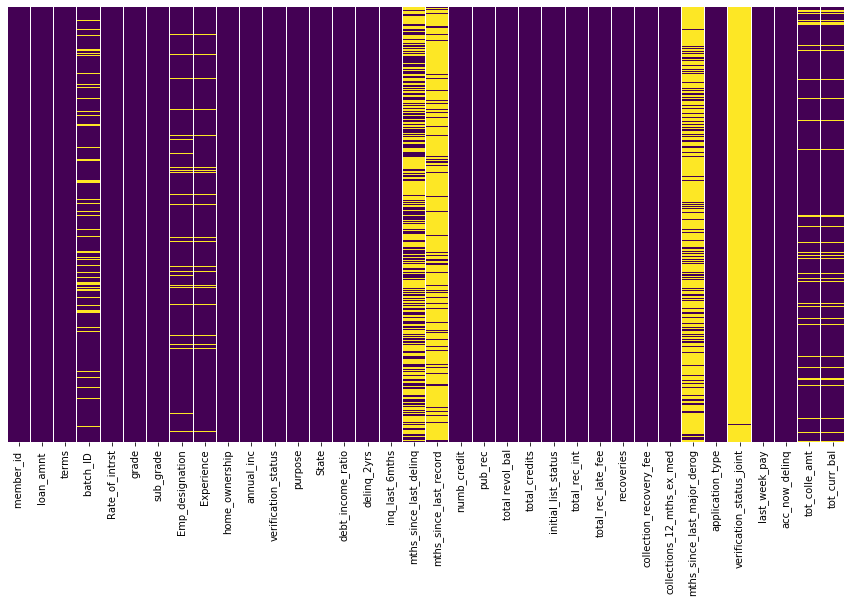

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [14]:
# Columns with more than 50% null values

In [15]:
for feature in features_with_na:
    if np.round(data[feature].isnull().mean(), 4) > 0.7:
        print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values')

mths_since_last_record 0.8456  % missing values
mths_since_last_major_derog 0.7502  % missing values
verification_status_joint 0.9994  % missing values


#### The 4 columns 'mths_since_last_record', 'mths_since_last_major_derog' and 'verification_status_joint'  which have more than 50% missing values, hence they are dropped as it is not recommeded to impute so much of missing data

#### The columns like 'member_id' and 'batch_ID' are also dropped as they are not so useful in the analysis

In [16]:
dataset = data.drop(columns=['mths_since_last_record','mths_since_last_major_derog', 'verification_status_joint','member_id ','batch_ID '], axis=1)

In [17]:
dataset.shape

(887379, 31)

### Numerical variables in the data

In [18]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  19


In [19]:
dataset[numerical_features].head()

,loan_amnt,Rate_of_intrst,annual_inc,debt_income_ratio,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,numb_credit,pub_rec,total revol_bal,total_credits,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_colle_amt,tot_curr_bal
0,14350,19.19,28700.0,33.88,0.0,1.0,50.0,14.0,1.0,22515.0,28.0,1173.84,0.0,0.0,0.0,0.0,0.0,0.0,28699.0
1,4800,10.99,65000.0,3.64,0.0,1.0,NaN,6.0,0.0,7624.0,13.0,83.95,0.0,0.0,0.0,0.0,0.0,0.0,9974.0
2,10000,7.26,45000.0,18.42,0.0,0.0,NaN,5.0,0.0,10877.0,19.0,56.47,0.0,0.0,0.0,0.0,0.0,65.0,38295.0
3,15000,19.72,105000.0,14.97,0.0,2.0,46.0,10.0,0.0,13712.0,21.0,4858.62,0.0,0.0,0.0,0.0,0.0,0.0,55564.0
4,16000,10.64,52000.0,20.16,0.0,0.0,NaN,11.0,0.0,35835.0,27.0,2296.41,0.0,0.0,0.0,0.0,0.0,0.0,47159.0


### Univariate analysis

In [20]:
# Lets analyse the continuous values by creating histograms to understand the distribution

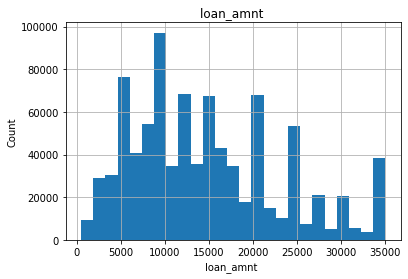

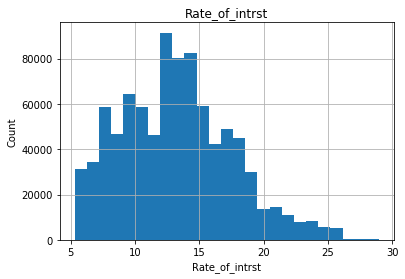

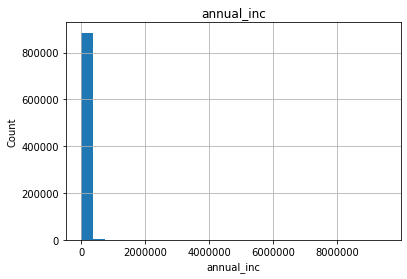

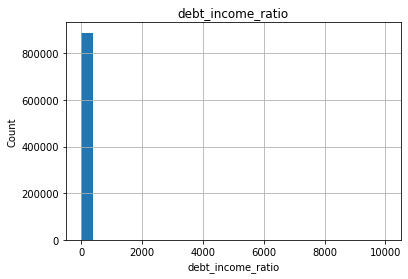

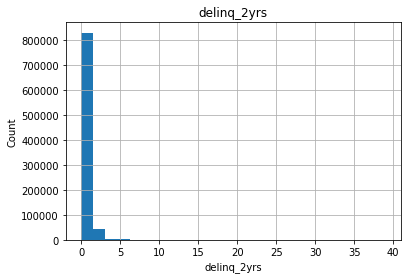

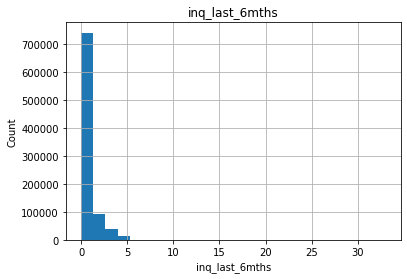

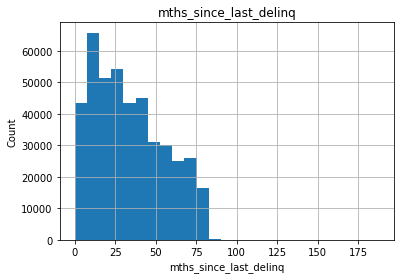

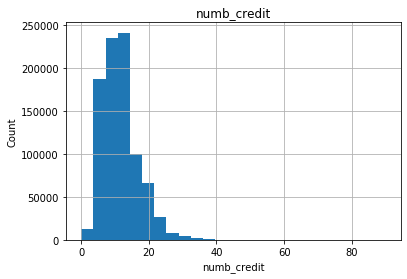

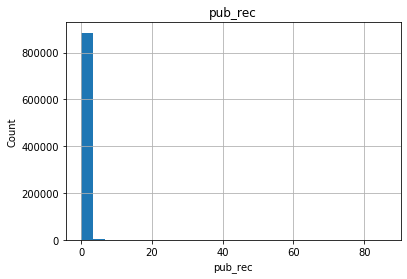

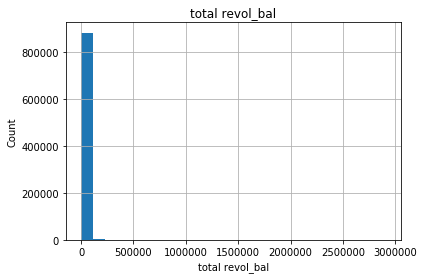

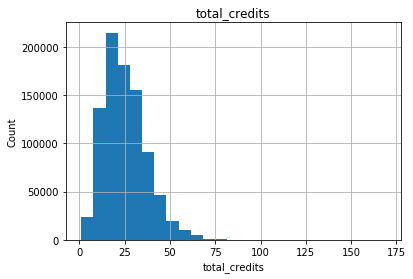

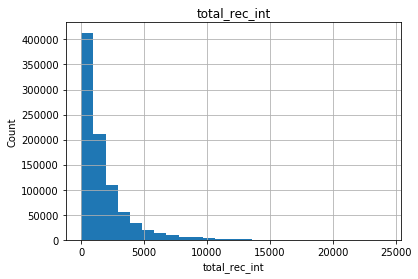

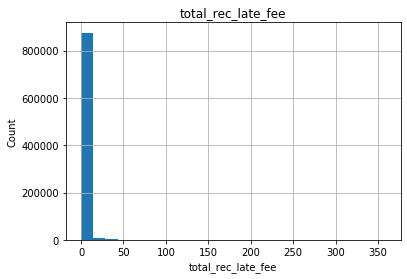

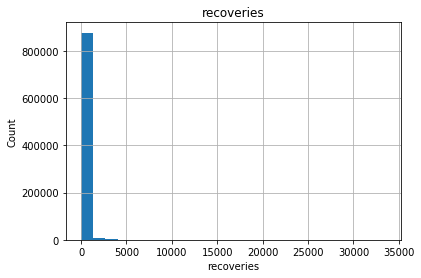

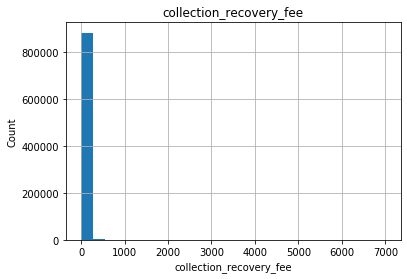

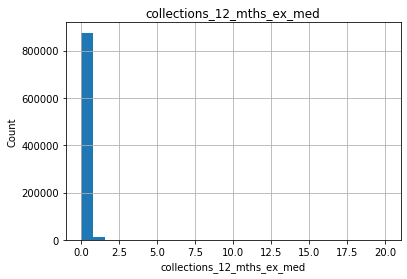

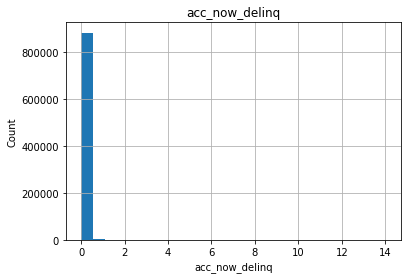

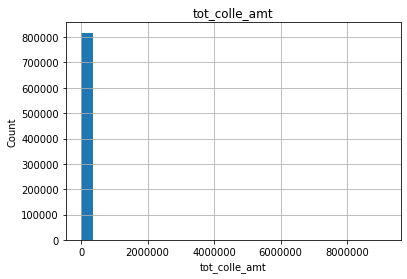

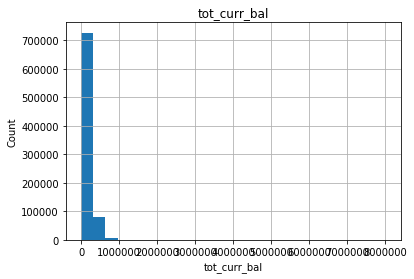

In [21]:
for feature in numerical_features:
    data = dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

#### The distribution of data for many columns is not normal or Gaussion distribution, hence they are skewed

### Checking the boxplots

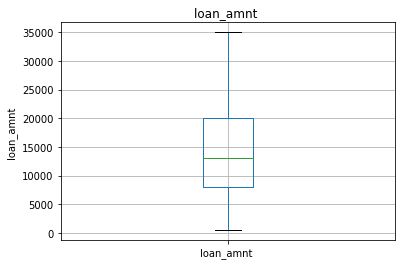

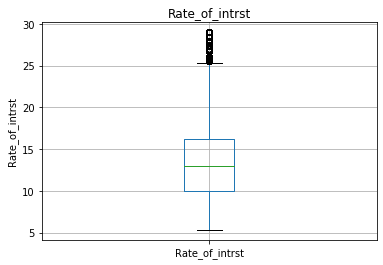

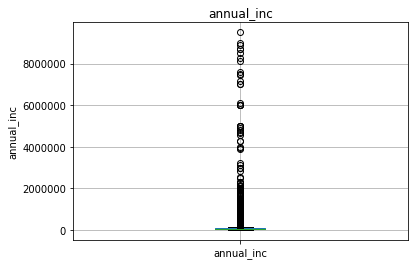

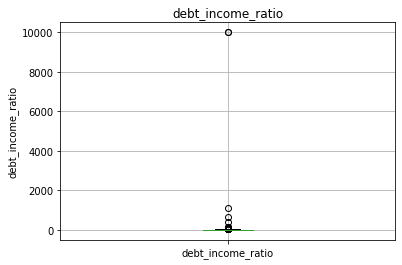

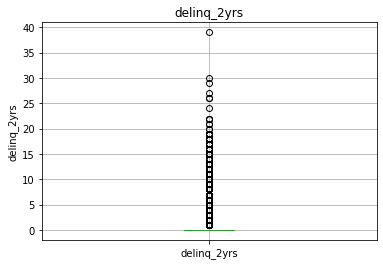

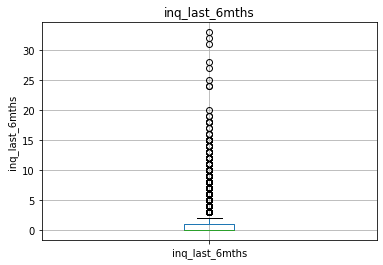

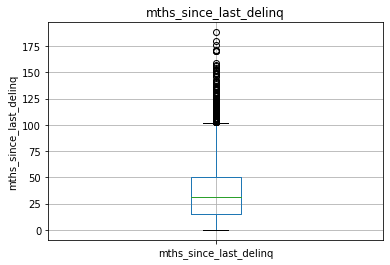

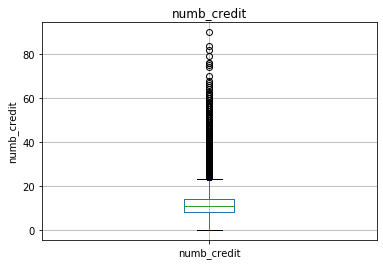

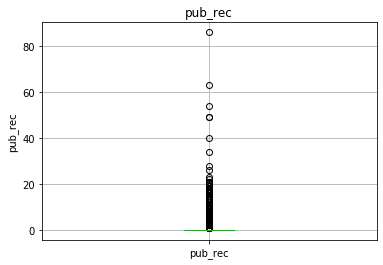

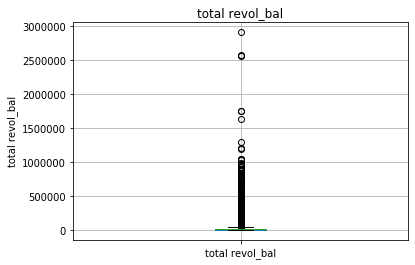

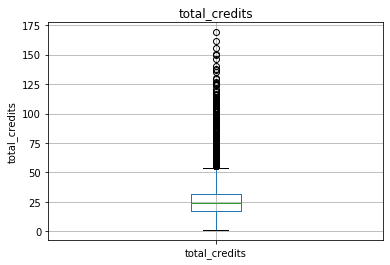

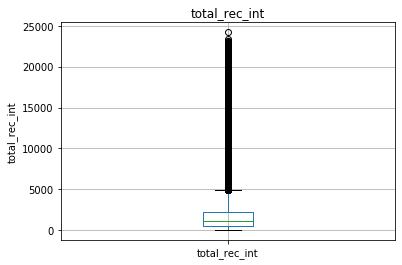

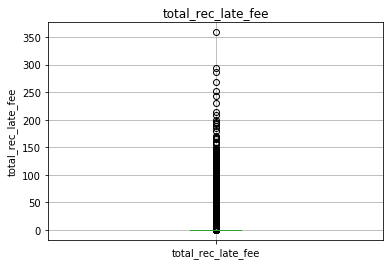

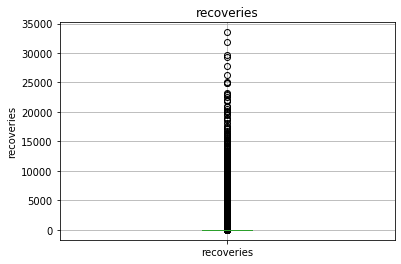

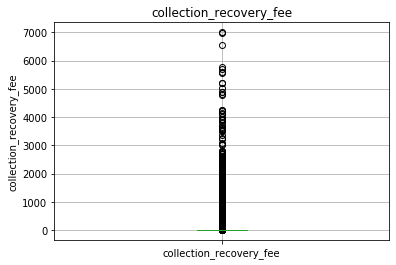

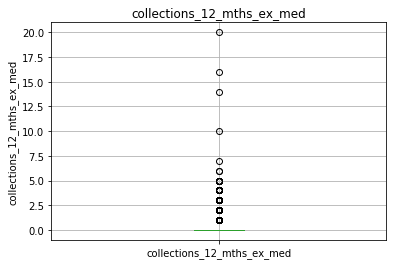

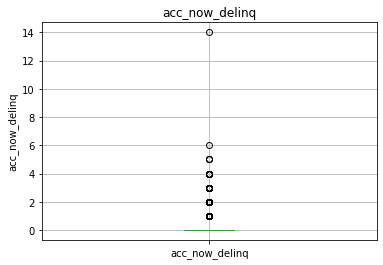

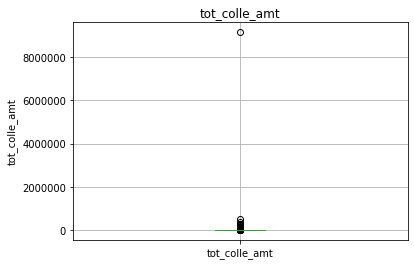

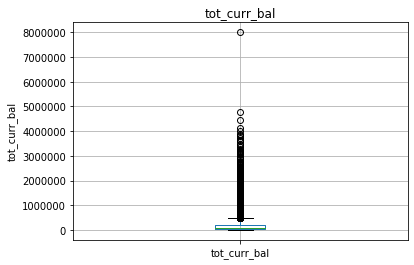

In [22]:
for feature in numerical_features:
    data = dataset.copy()
    dataset.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

#### Lot of outliers are present in many columns as seen with the boxplots

### Bivariate analysis

In [23]:
# Using scatter plots of indepedent numerical variables with the output variable 

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


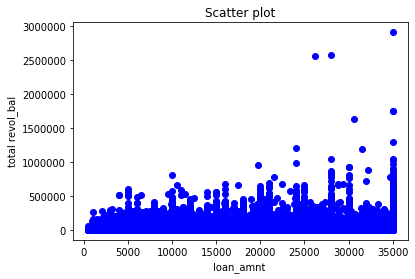

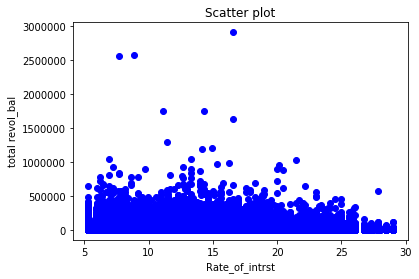

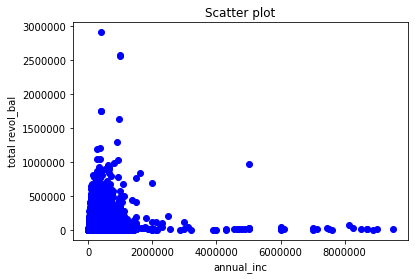

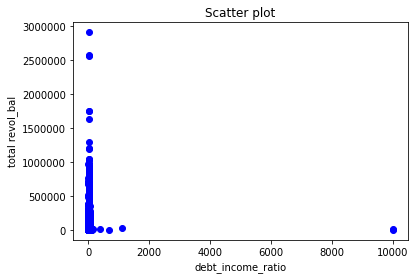

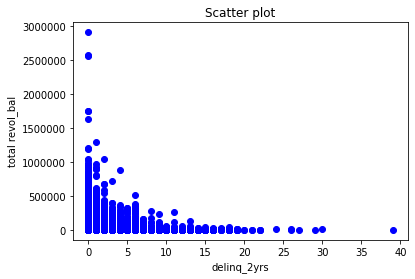

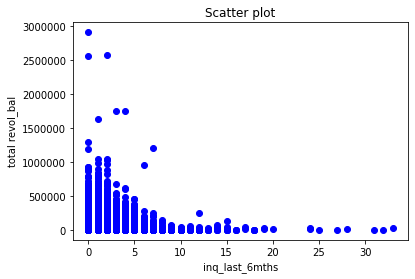

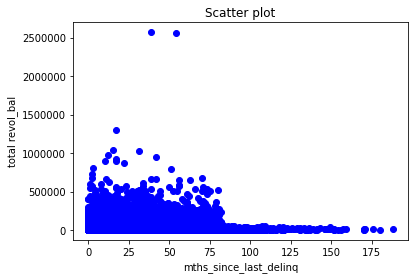

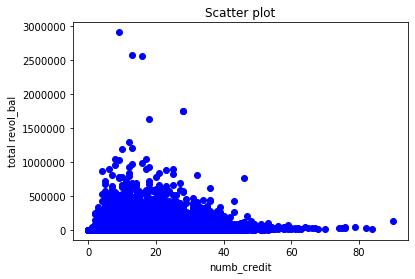

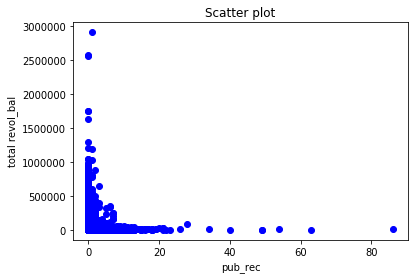

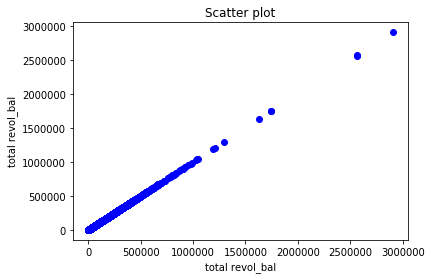

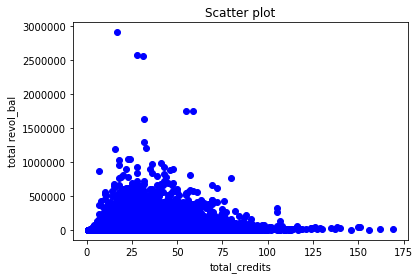

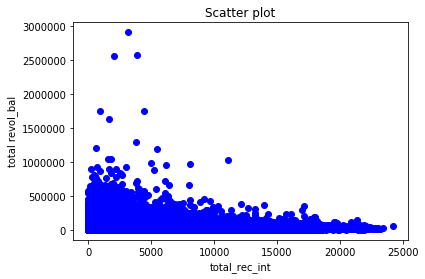

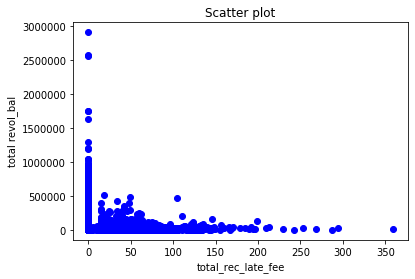

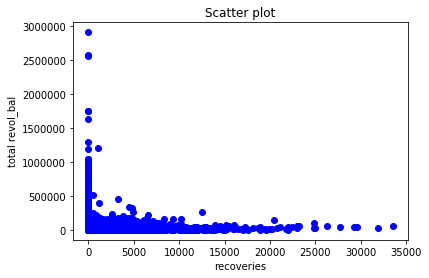

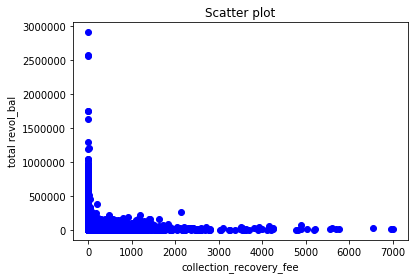

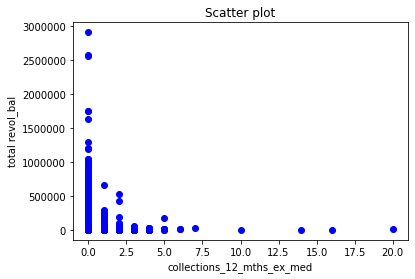

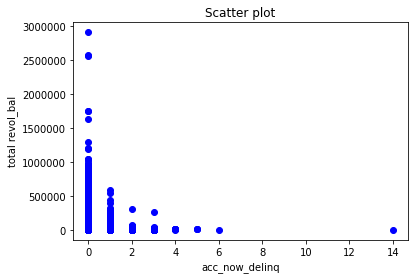

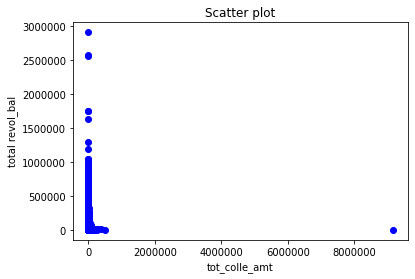

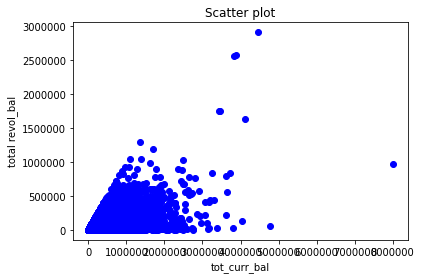

In [24]:
for feature in numerical_features:
    data = dataset.copy()
    plt.plot(data[feature], data['total revol_bal'], "bo")
    plt.xlabel(feature)
    plt.ylabel('total revol_bal')
    plt.title("Scatter plot")
    plt.show()

#### Scatter plots of some columns shows good co-relation with the output variable

## Categorical variables

In [25]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']
print('Number of categorical variables: ', len(categorical_features))

Number of categorical variables:  12


In [26]:
dataset[categorical_features].head()

,terms,grade,sub_grade,Emp_designation,Experience,home_ownership,verification_status,purpose,State,initial_list_status,application_type,last_week_pay
0,36 months,E,E3,clerk,9 years,OWN,Source Verified,debt_consolidation,FL,f,INDIVIDUAL,26th week
1,36 months,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,Source Verified,home_improvement,MD,w,INDIVIDUAL,9th week
2,36 months,A,A4,Driver,2 years,OWN,Not Verified,debt_consolidation,OH,w,INDIVIDUAL,9th week
3,36 months,D,D5,Us office of Personnel Management,10+ years,RENT,Not Verified,debt_consolidation,VA,f,INDIVIDUAL,135th week
4,36 months,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,Verified,credit_card,CA,w,INDIVIDUAL,96th week


In [27]:
# Checking the number of unique values in each variable

In [28]:
dataset[categorical_features].nunique()

terms                       2
grade                       7
sub_grade                  35
Emp_designation        289207
Experience                 11
home_ownership              6
verification_status         3
purpose                    14
State                      51
initial_list_status         2
application_type            2
last_week_pay              98
dtype: int64

### Univariate analysis

In [29]:
# Using countplots see the frequencies of each categotical values

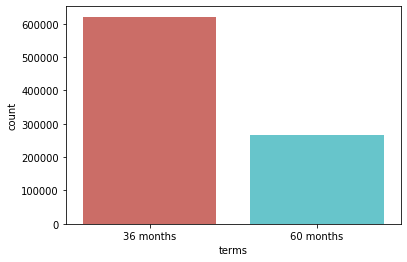

In [30]:
sns.countplot("terms", data=dataset, palette='hls')

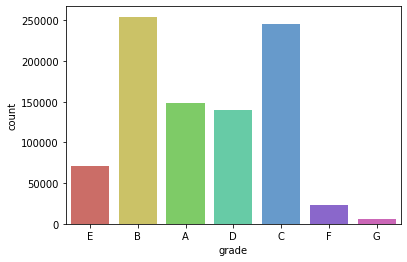

In [31]:
sns.countplot("grade", data=dataset, palette='hls')

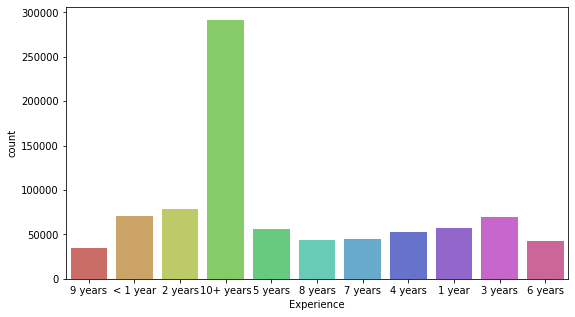

In [32]:
plt.figure(figsize=(9,5))
sns.countplot("Experience", data=dataset, palette='hls')

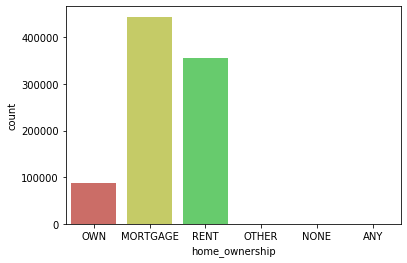

In [33]:
sns.countplot("home_ownership", data=dataset, palette='hls')

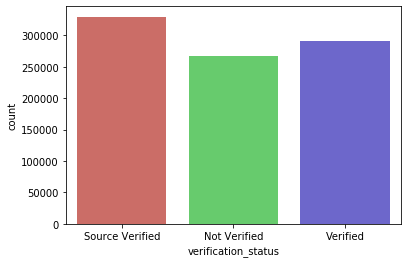

In [34]:
sns.countplot("verification_status", data=dataset, palette='hls')

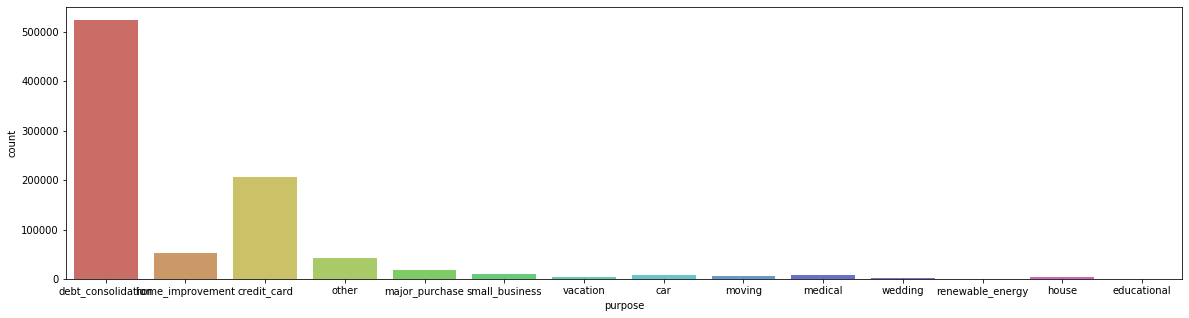

In [35]:
plt.figure(figsize=(20,5))
sns.countplot("purpose", data=dataset, palette='hls')

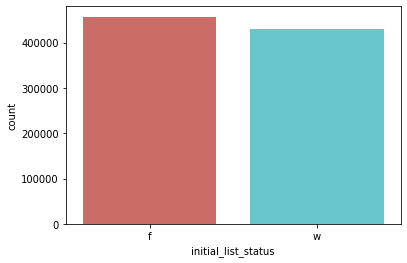

In [36]:
sns.countplot("initial_list_status", data=dataset, palette='hls')

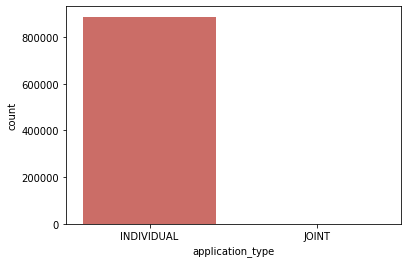

In [37]:
sns.countplot("application_type", data=dataset, palette='hls')

### Bi-variate analysis

In [38]:
# Plotting categorical values with the output variable to check relation

Text(0, 0.5, 'total revol_bal')

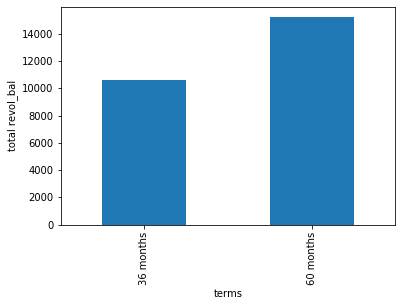

In [39]:
dataset.groupby('terms')['total revol_bal'].median().plot.bar(); plt.xlabel('terms'); plt.ylabel('total revol_bal')

Text(0, 0.5, 'total revol_bal')

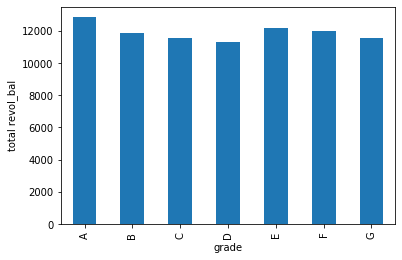

In [40]:
dataset.groupby('grade')['total revol_bal'].median().plot.bar(); plt.xlabel('grade'); plt.ylabel('total revol_bal')

Text(0, 0.5, 'total revol_bal')

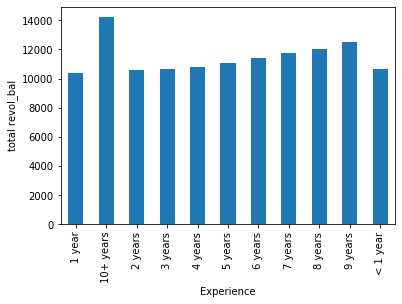

In [41]:
dataset.groupby('Experience')['total revol_bal'].median().plot.bar(); plt.xlabel('Experience'); plt.ylabel('total revol_bal')

Text(0, 0.5, 'total revol_bal')

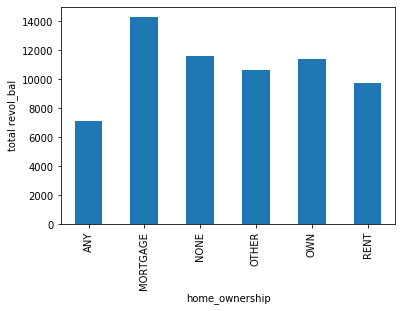

In [42]:
dataset.groupby('home_ownership')['total revol_bal'].median().plot.bar(); plt.xlabel('home_ownership'); plt.ylabel('total revol_bal')

Text(0, 0.5, 'total revol_bal')

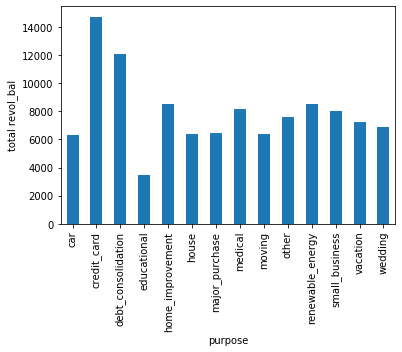

In [43]:
dataset.groupby('purpose')['total revol_bal'].median().plot.bar(); plt.xlabel('purpose'); plt.ylabel('total revol_bal')

Text(0, 0.5, 'total revol_bal')

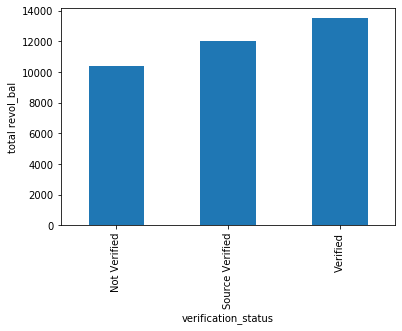

In [44]:
dataset.groupby('verification_status')['total revol_bal'].median().plot.bar(); plt.xlabel('verification_status'); plt.ylabel('total revol_bal')

#### Some categorical varibales have good influence on the output variable

## Feature Engineering

### Co-relation matrix for checking correlation

In [45]:
correlation = dataset.corr()
correlation

,loan_amnt,Rate_of_intrst,annual_inc,debt_income_ratio,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,numb_credit,pub_rec,total revol_bal,total_credits,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_colle_amt,tot_curr_bal
loan_amnt,1.000000,0.145023,0.332698,0.020675,-0.000159,-0.034168,-0.038080,0.198906,-0.081177,0.333580,0.222639,0.533916,0.031395,0.073150,0.052205,-0.016650,0.003947,-0.004275,0.328782
Rate_of_intrst,0.145023,1.000000,-0.072786,0.079903,0.055178,0.227650,-0.030033,-0.010381,0.052156,-0.035708,-0.038618,0.445679,0.057150,0.106840,0.070867,0.013336,0.026478,0.001130,-0.091408
annual_inc,0.332698,-0.072786,1.000000,-0.087410,0.047470,0.035193,-0.050350,0.138392,-0.008341,0.295784,0.187335,0.128535,0.013500,0.007717,0.006630,-0.003936,0.014775,0.001096,0.418332
debt_income_ratio,0.020675,0.079903,-0.087410,1.000000,-0.002831,-0.008106,0.001447,0.144250,-0.022926,0.067277,0.108056,0.008380,-0.005748,0.001162,0.002159,-0.000292,0.003205,-0.002084,-0.007282
delinq_2yrs,-0.000159,0.055178,0.047470,-0.002831,1.000000,0.021375,-0.562654,0.051189,-0.011004,-0.032486,0.122713,0.001665,0.017432,-0.000729,0.000989,0.063016,0.130326,0.000207,0.064762
inq_last_6mths,-0.034168,0.227650,0.035193,-0.008106,0.021375,1.000000,0.014748,0.111235,0.056870,-0.017556,0.135584,0.085585,0.031637,0.045590,0.034007,0.006850,-0.005329,0.003171,0.034338
mths_since_last_delinq,-0.038080,-0.030033,-0.050350,0.001447,-0.562654,0.014748,1.000000,-0.043182,0.096646,-0.026798,-0.044920,-0.028208,-0.021321,-0.004525,-0.005180,-0.035834,-0.139118,0.006466,-0.093911
numb_credit,0.198906,-0.010381,0.138392,0.144250,0.051189,0.111235,-0.043182,1.000000,-0.025301,0.224542,0.695075,0.061223,-0.009606,0.001560,0.003217,0.009610,0.017752,0.000124,0.244134
pub_rec,-0.081177,0.052156,-0.008341,-0.022926,-0.011004,0.056870,0.096646,-0.025301,1.000000,-0.100609,0.012472,-0.060064,-0.011445,-0.014477,-0.008795,0.021039,0.000349,0.006891,-0.075814
total revol_bal,0.333580,-0.035708,0.295784,0.067277,-0.032486,-0.017556,-0.026798,0.224542,-0.100609,1.000000,0.189105,0.137380,0.002774,0.010828,0.008151,-0.022854,-0.000855,-0.006219,0.442036


In [46]:
# Plotting the correlation using heatmap

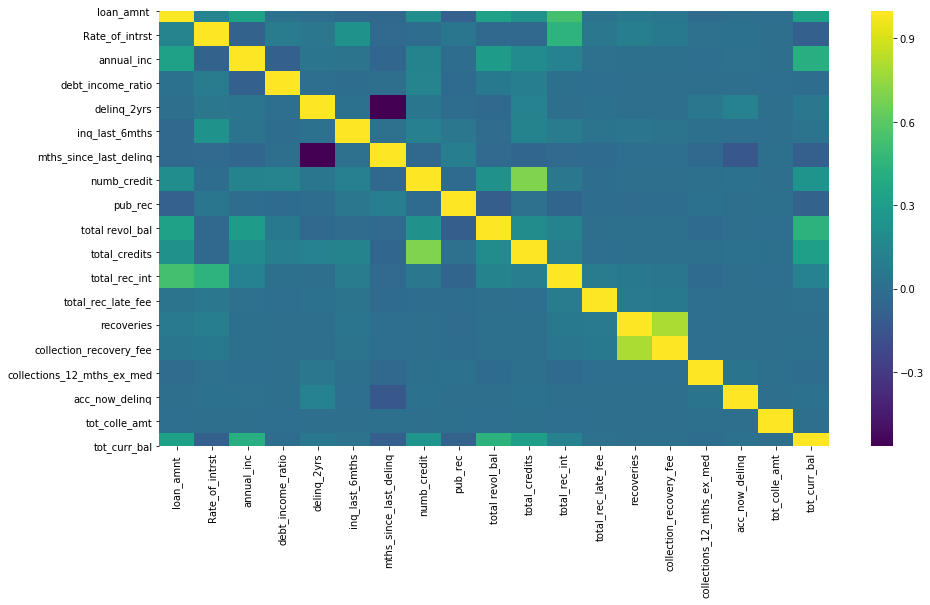

In [47]:
plt.figure(figsize=(15,8))
sns.heatmap(correlation,xticklabels='auto',yticklabels='auto',cbar=True,cmap="viridis")

#### The variables "collection_recovery_fee" and "total_credits" from the dataset have high correlation with "recoveries" and "numb_credit" respectively

In [48]:
dataset["recoveries"].corr(dataset["collection_recovery_fee"])

0.8024196077109375

In [49]:
dataset["numb_credit"].corr(dataset["total_credits"])

0.6950752378121778

#### Hence the "collection_recovery_fee" and "total_credits" variables are dropped

In [50]:
dataset =dataset.drop(columns = ["collection_recovery_fee","total_credits"],axis=1 )

In [51]:
dataset.shape

(887379, 29)

## Handling the missing values

In [52]:
dataset.isna().sum()

loan_amnt                          0
terms                              0
Rate_of_intrst                     0
grade                              0
sub_grade                          0
Emp_designation                51462
Experience                     44825
home_ownership                     0
annual_inc                         4
verification_status                0
purpose                            0
State                              0
debt_income_ratio                  0
delinq_2yrs                       29
inq_last_6mths                    29
mths_since_last_delinq        454312
numb_credit                       29
pub_rec                           29
total revol_bal                    0
initial_list_status                0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collections_12_mths_ex_med       145
application_type                   0
last_week_pay                      0
acc_now_delinq                    29
t

### Replacing the NA values in categorical variables

#### Emp_designation

In [53]:
dataset["Emp_designation"].describe()

count      835917
unique     289207
top       Teacher
freq        13807
Name: Emp_designation, dtype: object

In [54]:
# Replacing the NA values in designation with "No designation"

In [55]:
dataset["Emp_designation"].fillna("No_designation", inplace = True) 

####  Experience

In [56]:
dataset["Experience"].describe()

count        842554
unique           11
top       10+ years
freq         291569
Name: Experience, dtype: object

In [57]:
# Replacing the NA values in experience as "0 years"

In [58]:
dataset["Experience"].fillna("0 years", inplace=True)

### Replacing NA values in numerical variables

In [59]:
# Replacing the NA values in the numerical variables with the median

In [60]:
for feature in dataset:
    if dataset[feature].isna().sum() > 0:
        dataset[feature]= dataset[feature].fillna(dataset[feature].median())

In [61]:
dataset.isna().sum()

loan_amnt                     0
terms                         0
Rate_of_intrst                0
grade                         0
sub_grade                     0
Emp_designation               0
Experience                    0
home_ownership                0
annual_inc                    0
verification_status           0
purpose                       0
State                         0
debt_income_ratio             0
delinq_2yrs                   0
inq_last_6mths                0
mths_since_last_delinq        0
numb_credit                   0
pub_rec                       0
total revol_bal               0
initial_list_status           0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collections_12_mths_ex_med    0
application_type              0
last_week_pay                 0
acc_now_delinq                0
tot_colle_amt                 0
tot_curr_bal                  0
dtype: int64

#### All the NA values has been replaced

### Handling the categorical variables

In [62]:
dataset[categorical_features].nunique()

terms                       2
grade                       7
sub_grade                  35
Emp_designation        289208
Experience                 12
home_ownership              6
verification_status         3
purpose                    14
State                      51
initial_list_status         2
application_type            2
last_week_pay              98
dtype: int64

In [63]:
dataset.groupby('grade').median()

,loan_amnt,Rate_of_intrst,annual_inc,debt_income_ratio,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,numb_credit,pub_rec,total revol_bal,total_rec_int,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_colle_amt,tot_curr_bal
grade,,,,,,,,,,,,,,,,,
A,12000,7.26,75000.0,15.080,0.0,0.0,31.0,11.0,0.0,12866.0,602.775,0.0,0.0,0.0,0.0,0.0,101383.0
B,12000,10.99,65000.0,16.860,0.0,0.0,31.0,10.0,0.0,11879.0,919.720,0.0,0.0,0.0,0.0,0.0,80559.0
C,12000,13.99,60000.0,18.350,0.0,0.0,31.0,11.0,0.0,11563.0,1155.380,0.0,0.0,0.0,0.0,0.0,80559.0
D,14000,16.99,60000.0,19.450,0.0,1.0,31.0,11.0,0.0,11304.0,1602.780,0.0,0.0,0.0,0.0,0.0,76729.5
E,16850,19.99,61000.0,20.050,0.0,1.0,31.0,11.0,0.0,12155.0,2065.040,0.0,0.0,0.0,0.0,0.0,80559.0
F,18625,23.76,65000.0,19.695,0.0,1.0,31.0,11.0,0.0,12022.5,2838.740,0.0,0.0,0.0,0.0,0.0,80559.0
G,20000,25.83,68000.0,19.280,0.0,1.0,31.0,11.0,0.0,11553.0,3705.820,0.0,0.0,0.0,0.0,0.0,80559.0


Text(0, 0.5, 'Rate_of_intrst')

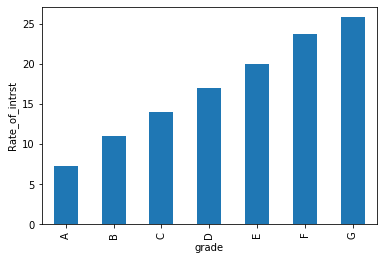

In [64]:
dataset.groupby('grade')['Rate_of_intrst'].median().plot.bar(); plt.xlabel('grade'); plt.ylabel('Rate_of_intrst')

Text(0, 0.5, 'Rate_of_intrst')

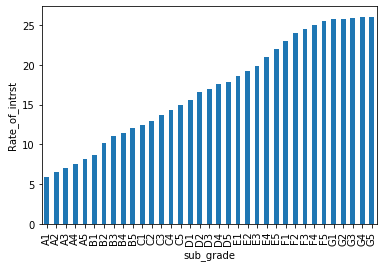

In [65]:
dataset.groupby('sub_grade')['Rate_of_intrst'].median().plot.bar(); plt.xlabel('sub_grade'); plt.ylabel('Rate_of_intrst')

#### Since grades and subgrades are having high correlation with rate of interest, they can be dropped and only rate of interest is retained

In [66]:
# State v/s total revol_bal

Text(0, 0.5, 'total revol_bal')

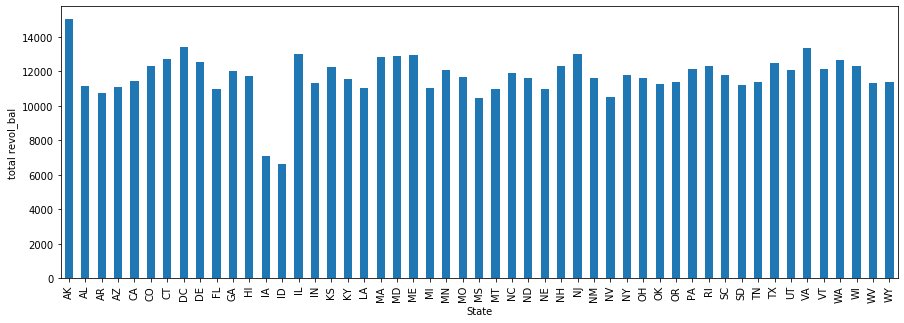

In [67]:
plt.figure(figsize=(15,5))
dataset.groupby('State')['total revol_bal'].median().plot.bar(); plt.xlabel('State'); plt.ylabel('total revol_bal')

#### There is not much change in the output variable with respect to the states, which can be dropped

In [68]:
# last_week_pay v/s total revol bal

Text(0, 0.5, 'total revol_bal')

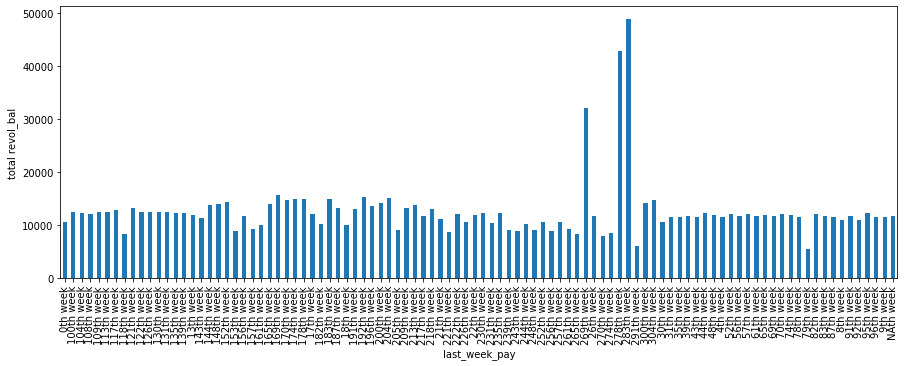

In [69]:
plt.figure(figsize=(15,5))
dataset.groupby('last_week_pay')['total revol_bal'].median().plot.bar(); plt.xlabel('last_week_pay'); plt.ylabel('total revol_bal')

#### There is some significant changes in the output variable with the last_week_pay

In [70]:
dataset = dataset.drop(columns=["grade","sub_grade","Emp_designation","State"],axis=1)

In [71]:
dataset.shape

(887379, 25)

In [72]:
# Converting the experience variable from object type to integer type by extracting only numbers

In [73]:
def split_num(my_str):
    num = [x for x in my_str if x.isdigit()]
    num = "".join(num)

    if not num:
        num = None

    return num

In [74]:
Exp = []
for i in dataset["Experience"]:
    exp = split_num(i)
    Exp.append(exp)

In [75]:
len(Exp)

887379

In [76]:
dataset["Experience"] = Exp

In [77]:
dataset["Experience"] = pd.to_numeric(dataset["Experience"])

In [78]:
# Converting the 'last week pay' variable from object type to integer type by extracting only numbers

In [79]:
Pay = []
for i in dataset["last_week_pay"]:
    pay = split_num(i)
    Pay.append(pay)

In [81]:
dataset["last_week_pay"] = Pay

In [82]:
dataset["last_week_pay"] = pd.to_numeric(dataset["last_week_pay"])

In [83]:
dataset["last_week_pay"]= dataset["last_week_pay"].fillna(dataset["last_week_pay"].median())

In [84]:
dataset["last_week_pay"].isna().sum()

0

In [85]:
# Encoding other categorical variables

In [86]:
dataset = pd.get_dummies(dataset, columns =['terms','home_ownership','verification_status','purpose','initial_list_status','application_type'],drop_first=True)

In [87]:
dataset.head()

,loan_amnt,Rate_of_intrst,Experience,annual_inc,debt_income_ratio,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,numb_credit,pub_rec,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_JOINT
0,14350,19.19,9,28700.0,33.88,0.0,1.0,50.0,14.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,4800,10.99,1,65000.0,3.64,0.0,1.0,31.0,6.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,10000,7.26,2,45000.0,18.42,0.0,0.0,31.0,5.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,15000,19.72,10,105000.0,14.97,0.0,2.0,46.0,10.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,16000,10.64,10,52000.0,20.16,0.0,0.0,31.0,11.0,0.0,...,0,0,0,0,0,0,0,0,1,0


## Handling the outliers

In [88]:
# Quantile calculations

In [89]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1

In [90]:
# Number of extreme outliers in each variable

In [91]:
((dataset < (Q1 - 3 * IQR)) | (dataset > (Q3 + 3 * IQR))).sum()

loan_amnt                                   0
Rate_of_intrst                              0
Experience                                  0
annual_inc                              12122
debt_income_ratio                          29
delinq_2yrs                            170389
inq_last_6mths                           5678
mths_since_last_delinq                 426719
numb_credit                              3494
pub_rec                                135778
total revol_bal                         18428
total_rec_int                           23467
total_rec_late_fee                      12517
recoveries                              24677
collections_12_mths_ex_med              11681
last_week_pay                              28
acc_now_delinq                           4114
tot_colle_amt                          116157
tot_curr_bal                             6965
terms_60 months                             0
home_ownership_MORTGAGE                     0
home_ownership_NONE               

#### Since there are lot of outliers in many columns, it is not feasible to drop such outliers directly

In [135]:
# Checking the skewness of numerical variables

In [92]:
num_features = ['loan_amnt ',
 'Rate_of_intrst',
'mths_since_last_delinq',
 'annual_inc',
 'debt_income_ratio',
 'delinq_2yrs',
 'inq_last_6mths',
 'numb_credit',
 'pub_rec',
 'total revol_bal',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_colle_amt',
 'tot_curr_bal']

In [93]:
dataset[num_features].skew()

loan_amnt                       0.681683
Rate_of_intrst                  0.429481
mths_since_last_delinq          0.945627
annual_inc                     44.478582
debt_income_ratio             441.486775
delinq_2yrs                     5.473884
inq_last_6mths                  2.108453
numb_credit                     1.249410
pub_rec                        13.262116
total revol_bal                15.949302
total_rec_int                   2.826100
total_rec_late_fee             17.404085
recoveries                     18.061839
collections_12_mths_ex_med     17.411826
acc_now_delinq                 24.066751
tot_colle_amt                 892.194172
tot_curr_bal                    3.078201
dtype: float64

In [94]:
# Getting the columns the with skewness value of more than 3

In [95]:
features_skew =[features for features in dataset[num_features].columns if dataset[num_features][features].skew() > 3]

In [96]:
df_skew = [] 
for feature in features_skew:
    skew = feature
    print(feature, dataset[num_features][feature].skew())
    df_skew.append(skew)

annual_inc 44.47858197170416
debt_income_ratio 441.4867750923928
delinq_2yrs 5.47388386527273
pub_rec 13.26211635338425
total revol_bal 15.949301612830574
total_rec_late_fee 17.4040853977096
recoveries 18.061838919949455
collections_12_mths_ex_med 17.41182615125681
acc_now_delinq 24.066751488814763
tot_colle_amt 892.1941722291699
tot_curr_bal 3.078201435368167


#### The skewness value of above variables is very high, hence they have to be handled carefully

In [100]:
df = dataset

### Extreme outliers detection and imputation

In [105]:
# List of skewwed variables

In [104]:
df_skew = ['annual_inc', 'debt_income_ratio', 'delinq_2yrs', 'pub_rec', 'total_rec_late_fee', 'recoveries', 'collections_12_mths_ex_med',
 'acc_now_delinq', 'tot_colle_amt', 'tot_curr_bal','tot_curr_bal', 'total_rec_int', 'inq_last_6mths','annual_inc', 'numb_credit']

### Getting the upper boundary and lower boundary for each feature

In [106]:
for feature in df_skew:
    IQR = df[feature].quantile(0.75)-df[feature].quantile(0.25)
    lower_bridge=df[feature].quantile(0.25)-(IQR*3)
    upper_bridge=df[feature].quantile(0.75)+(IQR*3)
    print(feature, lower_bridge), print(feature,upper_bridge)

annual_inc -90000.0
annual_inc 225000.0
debt_income_ratio -24.209999999999997
debt_income_ratio 60.06999999999999
delinq_2yrs 0.0
delinq_2yrs 0.0
pub_rec 0.0
pub_rec 0.0
total_rec_late_fee 0.0
total_rec_late_fee 0.0
recoveries 0.0
recoveries 0.0
collections_12_mths_ex_med 0.0
collections_12_mths_ex_med 0.0
acc_now_delinq 0.0
acc_now_delinq 0.0
tot_colle_amt 0.0
tot_colle_amt 0.0
tot_curr_bal -458398.0
tot_curr_bal 686438.0
tot_curr_bal -458398.0
tot_curr_bal 686438.0
total_rec_int -4948.955000000001
total_rec_int 7628.680000000001
inq_last_6mths -3.0
inq_last_6mths 4.0
annual_inc -90000.0
annual_inc 225000.0
numb_credit -10.0
numb_credit 32.0


In [107]:
# Removing the features 'delinq_2yrs', 'pub_rec', 'total_rec_late_fee', 'recoveries', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_colle_amt' as their upper boundary is zero

In [108]:
df_skew = ['annual_inc', 'debt_income_ratio', 'tot_curr_bal','tot_curr_bal', 'total_rec_int', 'inq_last_6mths','annual_inc', 'numb_credit']

In [109]:
for feature in df_skew:
    IQR = df[feature].quantile(0.75)-df[feature].quantile(0.25)
    lower_bridge=df[feature].quantile(0.25)-(IQR*3)
    upper_bridge=df[feature].quantile(0.75)+(IQR*3)
    df.loc[df[feature]>=upper_bridge,feature]=upper_bridge

In [111]:
# Skewness after outlier imputation

In [112]:
df[df_skew].skew()

annual_inc           1.531090
debt_income_ratio    0.232368
tot_curr_bal         1.637971
tot_curr_bal         1.637971
total_rec_int        1.741421
inq_last_6mths       1.476876
annual_inc           1.531090
numb_credit          1.034261
dtype: float64

#### The skewness values have considerably reduced in all the features

In [113]:
df.shape

(887379, 42)

In [114]:
df.columns

Index(['loan_amnt ', 'Rate_of_intrst', 'Experience', 'annual_inc',
       'debt_income_ratio', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'numb_credit', 'pub_rec', 'total revol_bal',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collections_12_mths_ex_med', 'last_week_pay', 'acc_now_delinq',
       'tot_colle_amt', 'tot_curr_bal', 'terms_60 months',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_w',
       'application_type_JOINT'],
    

In [115]:
# Seperating numerical and categorical variables from the data

In [116]:
df_cat = df[['terms_60 months',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_w',
       'application_type_JOINT']]

In [117]:
df_num = df[['loan_amnt ', 'Rate_of_intrst', 'Experience', 'annual_inc','mths_since_last_delinq',
       'debt_income_ratio', 'delinq_2yrs','last_week_pay', 'inq_last_6mths', 'numb_credit',
       'pub_rec', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_colle_amt', 'tot_curr_bal']]

In [118]:
# Output variable

In [119]:
df_out = df['total revol_bal']

In [120]:
# Combining numerical, categorical and output variables into one dataframe

In [121]:
final_df = pd.concat([df_num, df_cat, df_out], axis=1)

In [122]:
final_df.head()

,loan_amnt,Rate_of_intrst,Experience,annual_inc,mths_since_last_delinq,debt_income_ratio,delinq_2yrs,last_week_pay,inq_last_6mths,numb_credit,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_JOINT,total revol_bal
0,14350,19.19,9,28700.0,50.0,33.88,0.0,26.0,1.0,14.0,...,0,0,0,0,0,0,0,0,0,22515.0
1,4800,10.99,1,65000.0,31.0,3.64,0.0,9.0,1.0,6.0,...,0,0,0,0,0,0,0,1,0,7624.0
2,10000,7.26,2,45000.0,31.0,18.42,0.0,9.0,0.0,5.0,...,0,0,0,0,0,0,0,1,0,10877.0
3,15000,19.72,10,105000.0,46.0,14.97,0.0,135.0,2.0,10.0,...,0,0,0,0,0,0,0,0,0,13712.0
4,16000,10.64,10,52000.0,31.0,20.16,0.0,96.0,0.0,11.0,...,0,0,0,0,0,0,0,1,0,35835.0


In [123]:
final_df.shape

(887379, 42)

In [124]:
# Saving the final clean dataframe 

In [126]:
final_df.to_csv('Project_final_cleandata_eda.csv') 

## Feature Selection

In [127]:
df = pd.read_csv("Project_final_cleandata_eda.csv")
df.head()

,Unnamed: 0,loan_amnt,Rate_of_intrst,Experience,annual_inc,mths_since_last_delinq,debt_income_ratio,delinq_2yrs,last_week_pay,inq_last_6mths,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_JOINT,total revol_bal
0,0,14350,19.19,9,28700.0,50.0,33.88,0.0,26.0,1.0,...,0,0,0,0,0,0,0,0,0,22515.0
1,1,4800,10.99,1,65000.0,31.0,3.64,0.0,9.0,1.0,...,0,0,0,0,0,0,0,1,0,7624.0
2,2,10000,7.26,2,45000.0,31.0,18.42,0.0,9.0,0.0,...,0,0,0,0,0,0,0,1,0,10877.0
3,3,15000,19.72,10,105000.0,46.0,14.97,0.0,135.0,2.0,...,0,0,0,0,0,0,0,0,0,13712.0
4,4,16000,10.64,10,52000.0,31.0,20.16,0.0,96.0,0.0,...,0,0,0,0,0,0,0,1,0,35835.0


### Scaling the data

In [128]:
feature_scale=[feature for feature in df.columns if feature not in ["total revol_bal","Unnamed: 0"]]

In [129]:
from sklearn.preprocessing import MinMaxScaler

In [130]:
scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler()

In [131]:
scaled_data = pd.DataFrame(scaler.transform(df[feature_scale]),columns=feature_scale)

In [132]:
# Adding output variable to scaled data

In [133]:
scaled_data["total revol_bal"] = df["total revol_bal"]

In [134]:
scaled_data.head()

,loan_amnt,Rate_of_intrst,Experience,annual_inc,mths_since_last_delinq,debt_income_ratio,delinq_2yrs,last_week_pay,inq_last_6mths,numb_credit,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_JOINT,total revol_bal
0,0.401449,0.585974,0.9,0.127556,0.265957,0.564009,0.0,0.085526,0.25,0.43750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22515.0
1,0.124638,0.239544,0.1,0.288889,0.164894,0.060596,0.0,0.029605,0.25,0.18750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7624.0
2,0.275362,0.081960,0.2,0.200000,0.164894,0.306642,0.0,0.029605,0.00,0.15625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10877.0
3,0.420290,0.608365,1.0,0.466667,0.244681,0.249209,0.0,0.444079,0.50,0.31250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13712.0
4,0.449275,0.224757,1.0,0.231111,0.164894,0.335608,0.0,0.315789,0.00,0.34375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35835.0


### Seperating input and output variables

In [135]:
X = scaled_data.drop(columns=["total revol_bal"],axis=1)
y = scaled_data["total revol_bal"]

In [136]:
X.head()

,loan_amnt,Rate_of_intrst,Experience,annual_inc,mths_since_last_delinq,debt_income_ratio,delinq_2yrs,last_week_pay,inq_last_6mths,numb_credit,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_JOINT
0,0.401449,0.585974,0.9,0.127556,0.265957,0.564009,0.0,0.085526,0.25,0.43750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.124638,0.239544,0.1,0.288889,0.164894,0.060596,0.0,0.029605,0.25,0.18750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.275362,0.081960,0.2,0.200000,0.164894,0.306642,0.0,0.029605,0.00,0.15625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.420290,0.608365,1.0,0.466667,0.244681,0.249209,0.0,0.444079,0.50,0.31250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.449275,0.224757,1.0,0.231111,0.164894,0.335608,0.0,0.315789,0.00,0.34375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [137]:
y.head()

0    22515.0
1     7624.0
2    10877.0
3    13712.0
4    35835.0
Name: total revol_bal, dtype: float64

### Using OLS model to check p-values

In [138]:
import statsmodels.api as sm
from statsmodels.api import OLS

In [139]:
est = sm.OLS(y, X).fit()

In [140]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        total revol_bal   R-squared (uncentered):                   0.527
Model:                            OLS   Adj. R-squared (uncentered):              0.527
Method:                 Least Squares   F-statistic:                          2.409e+04
Date:                Sun, 11 Oct 2020   Prob (F-statistic):                        0.00
Time:                        16:51:37   Log-Likelihood:                     -1.0017e+07
No. Observations:              887379   AIC:                                  2.003e+07
Df Residuals:                  887338   BIC:                                  2.003e+07
Df Model:                          41                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
loan_amnt                            1.443e+04    140.817    102.503      0.000    1.42e+04    1.47e+04
Rate_of_intrst                       -297.9759    156.932     -1.899      0.058    -605.557       9.605
Experience                           1373.8613     57.166     24.033      0.000    1261.817    1485.905
annual_inc                           2.909e+04    163.382    178.062      0.000    2.88e+04    2.94e+04
mths_since_last_delinq              -7797.0069    287.833    -27.089      0.000   -8361.151   -7232.863
debt_income_ratio                    2.708e+04    171.250    158.157      0.000    2.67e+04    2.74e+04
delinq_2yrs                         -7.304e+04   1070.379    -68.240      0.000   -7.51e+04   -7.09e+04
last_week_pay                        6204.4252    219.910     28.213      0.000    5773.409    6635.441
inq_last_6mths                      -2170.8703     91.724    -23.667      0.000   -2350.646   -1991.094
numb_credit                          7388.8032    141.863     52.084      0.000    7110.756    7666.850
pub_rec                             -1.825e+05   3097.112    -58.936      0.000   -1.89e+05   -1.76e+05
total_rec_int                       -3434.0183    178.114    -19.280      0.000   -3783.116   -3084.921
total_rec_late_fee                  -6477.7429   1815.474     -3.568      0.000      -1e+04   -2919.475
recoveries                           2238.1322   1701.401      1.315      0.188   -1096.557    5572.822
collections_12_mths_ex_med          -3.838e+04   3071.201    -12.496      0.000   -4.44e+04   -3.24e+04
acc_now_delinq                      -2.421e+04   3748.987     -6.458      0.000   -3.16e+04   -1.69e+04
tot_colle_amt                       -8.691e+04    1.9e+04     -4.579      0.000   -1.24e+05   -4.97e+04
tot_curr_bal                         2.361e+04    142.552    165.611      0.000    2.33e+04    2.39e+04
terms_60 months                     -1286.6573     56.049    -22.956      0.000   -1396.510   -1176.804
home_ownership_MORTGAGE             -1.279e+04    239.226    -53.468      0.000   -1.33e+04   -1.23e+04
home_ownership_NONE                 -1.348e+04   2744.369     -4.912      0.000   -1.89e+04   -8102.687
home_ownership_OTHER                -1.028e+04   1453.033     -7.075      0.000   -1.31e+04   -7432.213
home_ownership_OWN                  -9766.5276    244.116    -40.008      0.000   -1.02e+04   -9288.069
home_ownership_RENT                 -1.157e+04    237.202    -48.775      0.000    -1.2e+04   -1.11e+04
verification_status_Source Verified    95.4596     52.480      1.819      0.069      -7.400     198.319
verification_status_Verified          769.5145     55.962     13.751    

#### recoveries, verification_status_Source Verified, purpose_medical,purpose_other, purpose_renewable_energy,purpose_moving,purpose_vacation have p_values more than 0.05, hence they are insignificant

### Backward Elimination

In [142]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols

In [143]:
print(selected_features_BE)

['loan_amnt ', 'Experience', 'annual_inc', 'mths_since_last_delinq', 'debt_income_ratio', 'delinq_2yrs', 'last_week_pay', 'inq_last_6mths', 'numb_credit', 'pub_rec', 'total_rec_int', 'total_rec_late_fee', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_colle_amt', 'tot_curr_bal', 'terms_60 months', 'home_ownership_OWN', 'home_ownership_RENT', 'verification_status_Verified', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_small_business', 'purpose_wedding', 'initial_list_status_w', 'application_type_JOINT']


In [144]:
len(selected_features_BE)

30

### Lasso regression

In [145]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [146]:
feature_sel_model = SelectFromModel(Lasso(alpha=1, random_state=0)) 
feature_sel_model.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=1, random_state=0))

In [147]:
selected_feat = X.columns[(feature_sel_model.get_support())]

In [148]:
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 41
selected features: 31
features with coefficients shrank to zero: 10


In [149]:
selected_feat

Index(['loan_amnt ', 'Rate_of_intrst', 'Experience', 'annual_inc',
       'mths_since_last_delinq', 'debt_income_ratio', 'delinq_2yrs',
       'last_week_pay', 'inq_last_6mths', 'numb_credit', 'pub_rec',
       'total_rec_int', 'collections_12_mths_ex_med', 'tot_curr_bal',
       'terms_60 months', 'home_ownership_MORTGAGE', 'home_ownership_OWN',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_other',
       'purpose_small_business', 'purpose_wedding', 'initial_list_status_w',
       'application_type_JOINT'],
      dtype='object')

In [150]:
# Columns which can be dropped

In [151]:
X.columns[feature_sel_model.estimator_.coef_ == 0]

Index(['total_rec_late_fee', 'recoveries', 'acc_now_delinq', 'tot_colle_amt',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_RENT',
       'purpose_moving', 'purpose_renewable_energy', 'purpose_vacation'],
      dtype='object')

#### From all the feature selection techniques it is difficult to tell which feature to be eliminated

In [152]:
final_df= scaled_data

In [153]:
final_df.head()

,loan_amnt,Rate_of_intrst,Experience,annual_inc,mths_since_last_delinq,debt_income_ratio,delinq_2yrs,last_week_pay,inq_last_6mths,numb_credit,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_JOINT,total revol_bal
0,0.401449,0.585974,0.9,0.127556,0.265957,0.564009,0.0,0.085526,0.25,0.43750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22515.0
1,0.124638,0.239544,0.1,0.288889,0.164894,0.060596,0.0,0.029605,0.25,0.18750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7624.0
2,0.275362,0.081960,0.2,0.200000,0.164894,0.306642,0.0,0.029605,0.00,0.15625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10877.0
3,0.420290,0.608365,1.0,0.466667,0.244681,0.249209,0.0,0.444079,0.50,0.31250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13712.0
4,0.449275,0.224757,1.0,0.231111,0.164894,0.335608,0.0,0.315789,0.00,0.34375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35835.0


In [154]:
final_df.shape

(887379, 42)

### Using Random Forest regressor to find important features

In [155]:
from sklearn.ensemble import RandomForestRegressor 

In [156]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 

In [157]:
regressor.fit(X, y) 

RandomForestRegressor(n_estimators=10, random_state=0)

In [158]:
# Get numerical feature importances
importances = list(regressor.feature_importances_)

In [159]:
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X, importances)]

In [160]:
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [161]:
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: tot_curr_bal         Importance: 0.19
Variable: debt_income_ratio    Importance: 0.14
Variable: loan_amnt            Importance: 0.11
Variable: annual_inc           Importance: 0.09
Variable: Rate_of_intrst       Importance: 0.06
Variable: numb_credit          Importance: 0.06
Variable: total_rec_int        Importance: 0.06
Variable: mths_since_last_delinq Importance: 0.05
Variable: Experience           Importance: 0.04
Variable: last_week_pay        Importance: 0.04
Variable: inq_last_6mths       Importance: 0.02
Variable: pub_rec              Importance: 0.02
Variable: delinq_2yrs          Importance: 0.01
Variable: tot_colle_amt        Importance: 0.01
Variable: terms_60 months      Importance: 0.01
Variable: home_ownership_MORTGAGE Importance: 0.01
Variable: home_ownership_OWN   Importance: 0.01
Variable: verification_status_Source Verified Importance: 0.01
Variable: verification_status_Verified Importance: 0.01
Variable: purpose_credit_card  Importance: 0.01
Variable: pu

#### Removing the variables which are not selected in other techniques and also having zero significance in feature importance

In [162]:
final_df.drop(columns=['collections_12_mths_ex_med', 'acc_now_delinq', 'application_type_JOINT'],axis=1, inplace=True)

In [163]:
final_df.shape

(887379, 39)

In [164]:
# saving the dataframe 
final_df.to_csv('Project_finaldata_fs.csv') 

## Model building

In [2]:
df = pd.read_csv("Project_finaldata_fs.csv")
df.head()

,Unnamed: 0,loan_amnt,Rate_of_intrst,Experience,annual_inc,mths_since_last_delinq,debt_income_ratio,delinq_2yrs,last_week_pay,inq_last_6mths,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,total revol_bal
0,0,0.401449,0.585974,0.9,0.127556,0.265957,0.564009,0.0,0.085526,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22515.0
1,1,0.124638,0.239544,0.1,0.288889,0.164894,0.060596,0.0,0.029605,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7624.0
2,2,0.275362,0.081960,0.2,0.200000,0.164894,0.306642,0.0,0.029605,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10877.0
3,3,0.420290,0.608365,1.0,0.466667,0.244681,0.249209,0.0,0.444079,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13712.0
4,4,0.449275,0.224757,1.0,0.231111,0.164894,0.335608,0.0,0.315789,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,35835.0


In [3]:
df.drop(columns= ["Unnamed: 0"], axis=1, inplace=True)

In [4]:
df.shape

(887379, 39)

In [5]:
df.columns

Index(['loan_amnt ', 'Rate_of_intrst', 'Experience', 'annual_inc',
       'mths_since_last_delinq', 'debt_income_ratio', 'delinq_2yrs',
       'last_week_pay', 'inq_last_6mths', 'numb_credit', 'pub_rec',
       'total_rec_int', 'total_rec_late_fee', 'recoveries', 'tot_colle_amt',
       'tot_curr_bal', 'terms_60 months', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Source Verified',
       'verification_status_Verified', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_w',
       'total revol_bal'],
      dtype='object')

### Seperating input and output variables

In [6]:
X = df.drop(columns=["total revol_bal"],axis=1)
Y = df["total revol_bal"]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test,y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

### Linear regression

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
from sklearn import metrics

In [11]:
reg = LinearRegression()

In [12]:
model = reg.fit(x_train, y_train)

In [13]:
print('Intercept: ', model.intercept_)

Intercept:  -20148.97736211908


In [14]:
print('Coefficients: \n', model.coef_)

Coefficients: 
 [ 1.43766350e+04 -2.31381901e+02  1.42471688e+03  2.90433180e+04
 -7.19679607e+03  2.70307014e+04 -7.41221069e+04  6.10290822e+03
 -2.17684393e+03  7.34294358e+03 -1.80856863e+05 -3.40383309e+03
 -8.03279023e+03  8.68725430e+02 -2.22504978e+06  2.38560280e+04
 -1.33294072e+03  7.16490438e+03  7.93693923e+03  9.06518148e+03
  1.02574990e+04  8.43600308e+03  1.05859906e+02  7.85873518e+02
  2.36251883e+03 -5.37995823e+02  4.46339037e+03 -2.95919888e+03
 -3.00822730e+03 -1.82955923e+03  4.63377263e-01  1.60053439e+02
 -8.12610340e+01  1.52058505e+03 -7.78285885e+02 -1.98312712e+02
 -1.40860519e+03 -2.30589979e+02]


In [15]:
# predicting trained values

In [16]:
y_pred1 = model.predict(x_train)

In [17]:
# predicting test values

In [18]:
y_pred2 = model.predict(x_test)

In [19]:
# Observed values v/s fitted values

Text(0, 0.5, 'Fitted values')

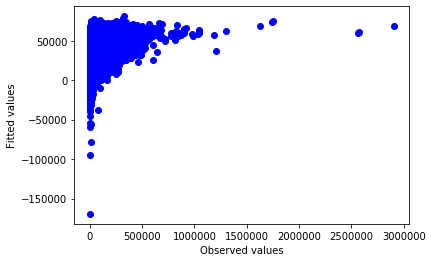

In [20]:
plt.scatter(y_train, y_pred1, c="b");plt.xlabel("Observed values");plt.ylabel("Fitted values")

In [21]:
neg_score = []
for i in y_pred2:
    if i < 0:
        neg_score.append(i)

In [22]:
len(neg_score)

8746

In [23]:
# RMSE value

In [24]:
print("RMSE for training data: ",np.sqrt(metrics.mean_squared_error(y_train,y_pred1)))

RMSE for training data:  19776.471008406486


In [25]:
print("RMSE for testing data: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))

RMSE for testing data:  18727.303516193173


### Random Forest 

In [26]:
from sklearn.ensemble import RandomForestRegressor 

In [27]:
regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)

In [28]:
regressor.fit(x_train, y_train) 

RandomForestRegressor(n_estimators=20, random_state=0)

In [29]:
# Predicting the values using the model

In [30]:
Y_pred1 = regressor.predict(x_train) 

In [31]:
Y_pred2 = regressor.predict(x_test) 

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


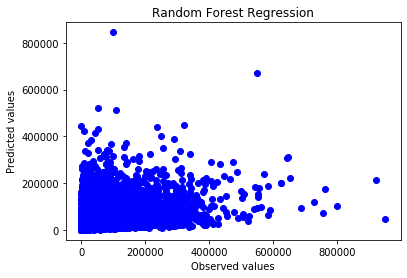

In [32]:
# plot predicted data 
plt.plot(y_test,Y_pred2,'bo')  
plt.title('Random Forest Regression') 
plt.xlabel('Observed values') 
plt.ylabel('Predicted values') 
plt.show()

In [33]:
# RMSE values

In [34]:
print('RMSE of training data:', np.sqrt(metrics.mean_squared_error(y_train, Y_pred1)))

RMSE of training data: 7753.655310958226


In [35]:
print('RMSE of testing data:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred2)))

RMSE of testing data: 18140.170745875083


### Decision tree classifier

In [36]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
dt_regressor = DecisionTreeRegressor(random_state = 0, max_depth=5)

In [38]:
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [39]:
# Predicting the output values

In [40]:
y_pred_dt1 = dt_regressor.predict(x_train)

In [41]:
y_pred_dt2 = dt_regressor.predict(x_test)

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


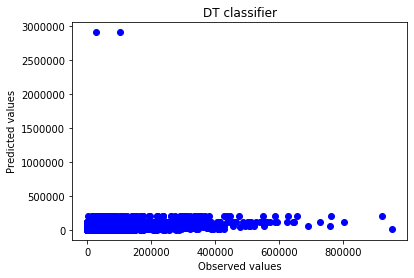

In [42]:
# plot predicted data 
plt.plot(y_test,y_pred_dt2,"bo")  
plt.title('DT classifier') 
plt.xlabel('Observed values') 
plt.ylabel('Predicted values') 
plt.show()

In [43]:
# RMSE values

In [44]:
print('RMSE of train dataset:', np.sqrt(metrics.mean_squared_error(y_train,y_pred_dt1)))

RMSE of train dataset: 19306.99882534597


In [45]:
print('RMSE of test dataset:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_dt2)))

RMSE of test dataset: 19864.584365958068


### XG Boosting

In [46]:
from xgboost.sklearn import XGBRegressor

C:\Users\Admin\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [47]:
xg_reg = XGBRegressor() 

In [48]:
xg_reg.fit(x_train, y_train)  

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
# Predicting the values using the model

In [50]:
y_pred_xg1 = xg_reg.predict(x_train) 

In [51]:
y_pred_xg2 = xg_reg.predict(x_test) 

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


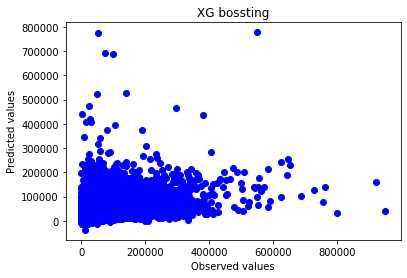

In [52]:
# plot predicted data 
plt.plot(y_test,y_pred_xg2,"bo")  
plt.title('XG bossting') 
plt.xlabel('Observed values') 
plt.ylabel('Predicted values') 
plt.show()

In [53]:
# RMSE values

In [54]:
print('RMSE Training data:', np.sqrt(metrics.mean_squared_error(y_train,y_pred_xg1)))

RMSE Training data: 15492.011594602469


In [55]:
print('RMSE Testing data:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_xg2)))

RMSE Testing data: 17542.040516327874


### Neural Network

In [263]:
from sklearn.neural_network import MLPRegressor

In [264]:
mlp = MLPRegressor(random_state = 1, max_iter = 50)

In [265]:
mlp.fit(x_train, y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(max_iter=50, random_state=1)

In [266]:
# Predicting output values

In [267]:
mlp_pred1 = mlp.predict(x_train)

In [268]:
mlp_pred2 = mlp.predict(x_test)

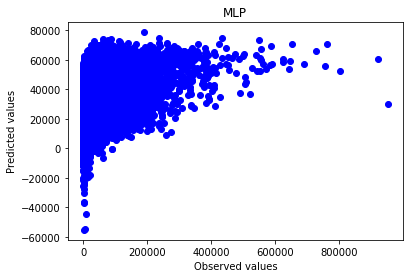

In [269]:
# plot predicted data 
plt.plot(y_test,mlp_pred2,"bo")  
plt.title('MLP') 
plt.xlabel('Observed values') 
plt.ylabel('Predicted values') 
plt.show()

In [270]:
# RMSE values

In [271]:
print('RMSE of training data:', np.sqrt(metrics.mean_squared_error(y_train,mlp_pred1)))

RMSE of training data: 19794.513588938036


In [272]:
print('RMSE of testing data:', np.sqrt(metrics.mean_squared_error(y_test,mlp_pred2)))

RMSE of testing data: 18251.071778802445


#### XG Boosting has built the model with lowest RMSE value amongst other models

### Hyper parameter tuning for XG Boosting

In [57]:
import xgboost

In [58]:
regressor=xgboost.XGBRegressor()

In [275]:
booster=['gbtree']
base_score=[0.5]

In [276]:
n_estimators = [100, 200]
max_depth = [10, 15]
learning_rate=[0.1,0.2]

In [277]:
# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'booster':booster,
    'base_score':base_score
    }

In [278]:
from sklearn.model_selection import RandomizedSearchCV

In [279]:
# Set up the random search with 3-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=3, n_iter=20,
            scoring = 'neg_mean_absolute_error',n_jobs = 3,
            verbose = 5, 
            return_train_score = True,
            random_state=36)

In [280]:
random_cv.fit(x_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed: 46.9min
[Parallel(n_jobs=3)]: Done  24 out of  24 | elapsed: 94.1min remaining:    0.0s
[Parallel(n_jobs=3)]: Done  24 out of  24 | elapsed: 94.1min finished


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_we

In [281]:
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
regressor = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
# Predicting the output values

In [62]:
y_pred_xgb1 = regressor.predict(x_train) 

In [63]:
y_pred_xgb2 = regressor.predict(x_test) 

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


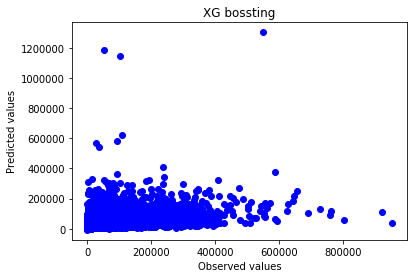

In [64]:
# plot predicted data 
plt.plot(y_test,y_pred_xgb2,"bo")  
plt.title('XG bossting') 
plt.xlabel('Observed values') 
plt.ylabel('Predicted values') 
plt.show()

In [65]:
# RMSE values

In [66]:
print('RMSE of training data:', np.sqrt(metrics.mean_squared_error(y_train,y_pred_xgb1)))

RMSE of training data: 12737.94076187548


In [67]:
print('RMSE of testing data:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_xgb2)))

RMSE of testing data: 17679.70118104418
